# EDA (Exploratory Data Analysis)

In this section, I will perform the initial steps of EDA by loading the dataset and taking a first look at the data. My goal is to understand the structure of the dataset and get an idea of the data types and initial values.



In [2]:

import pandas as pd

file_path = r'C:\Users\7981\Downloads\side_effect_data 1.xlsx'


data = pd.read_excel(file_path)
print("Data successfully loaded.")

print("\nDisplaying the first 5 rows of the dataset:")
print(data.head())  

Data successfully loaded.

Displaying the first 5 rows of the dataset:
   Kullanici_id Cinsiyet Dogum_Tarihi    Uyruk         Il   
0           107     Male   1960-03-01  Turkiye  Canakkale  \
1           140     Male   1939-10-12  Turkiye    Trabzon   
2             2   Female   1976-12-17  Turkiye  Canakkale   
3            83     Male   1977-06-17  Turkiye      Adana   
4             7   Female   1976-09-03  Turkiye      Izmir   

                         Ilac_Adi Ilac_Baslangic_Tarihi Ilac_Bitis_Tarihi   
0                 trifluoperazine            2022-01-09        2022-03-04  \
1                fluphenazine hcl            2022-01-09        2022-03-08   
2                 warfarin sodium            2022-01-11        2022-03-12   
3                   valproic acid            2022-01-04        2022-03-12   
4  carbamazepine extended release            2022-01-13        2022-03-06   

                Yan_Etki Yan_Etki_Bildirim_Tarihi Alerjilerim   
0               Kabizlik      2022

## Step 2: Inspecting Data Structure

In this step, I gather detailed information about the dataset, including:
- Column names
- Data types
- Non-null counts (which help identify missing values)

This step gives an overview of the structure of the dataset, helping us identify potential issues like missing data and the type of each variable.



In [3]:
print("\nGeneral information about the dataset:")
data.info()



General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjile

In [4]:
missing_data = pd.DataFrame({
    'Number of Missing Values': data.isnull().sum(),
    'Percentage of Missing Values (%)': (data.isnull().mean() * 100).round(2)
})

from IPython.display import display

print("\nNumber and percentage of missing values in each column:")
display(missing_data)



Number and percentage of missing values in each column:


,Number of Missing Values,Percentage of Missing Values (%)
Kullanici_id,0,0.00
Cinsiyet,778,33.01
Dogum_Tarihi,0,0.00
Uyruk,0,0.00
Il,227,9.63
Ilac_Adi,0,0.00
Ilac_Baslangic_Tarihi,0,0.00
Ilac_Bitis_Tarihi,0,0.00
Yan_Etki,0,0.00
Yan_Etki_Bildirim_Tarihi,0,0.00


## Step 3: Separating Categorical and Numerical Columns

In this step, I am separating the dataset's columns into categorical and numerical types. This helps understand which columns represent discrete categories and which columns contain numerical values.




In [5]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['number']).columns

print("\nCategorical columns:")
print(categorical_columns)

print("\nNumerical columns:")
print(numerical_columns)

for column in categorical_columns:
    print(f"\nColumn: {column}")
    print(data[column].value_counts(dropna=False))



Categorical columns:
Index(['Cinsiyet', 'Uyruk', 'Il', 'Ilac_Adi', 'Yan_Etki', 'Alerjilerim',
       'Kronik Hastaliklarim', 'Baba Kronik Hastaliklari',
       'Anne Kronik Hastaliklari', 'Kiz Kardes Kronik Hastaliklari',
       'Erkek Kardes Kronik Hastaliklari', 'Kan Grubu'],
      dtype='object')

Numerical columns:
Index(['Kullanici_id', 'Kilo', 'Boy'], dtype='object')

Column: Cinsiyet
Cinsiyet
Female    872
NaN       778
Male      707
Name: count, dtype: int64

Column: Uyruk
Uyruk
Turkiye    2357
Name: count, dtype: int64

Column: Il
Il
NaN          227
Adana        220
Mersin       207
Trabzon      195
Canakkale    179
Ankara       179
Eskisehir    174
Antalya      171
Bursa        169
Samsun       153
Istanbul     144
Izmir        121
Malatya      109
Kayseri      109
Name: count, dtype: int64

Column: Ilac_Adi
Ilac_Adi
chlordiazepoxide-amitriptyline                             29
lurasidone                                                 27
hydrocortisone cream               

## Step 4: Numerical and Categorical Variable Analysis

In this step, I perform a deeper analysis of the numerical and categorical variables by:
1. **Numerical Columns**: Calculating basic statistics for all numerical columns, such as mean, standard deviation, minimum, and maximum values.
2. **Numerical Distributions**: Using histograms to visualize the distribution of each numerical variable to detect patterns, trends, or outliers.
3. **Categorical Columns**: Displaying the top 10 most frequent values for each categorical variable using bar plots.


Basic statistics for numerical columns:
       Kullanici_id         Kilo          Boy
count   2357.000000  2064.000000  2243.000000
mean      97.216801    80.863857   174.638431
std       57.017200    18.635269    16.516552
min        1.000000    50.000000   145.000000
25%       47.000000    65.000000   160.000000
50%       97.000000    83.000000   176.000000
75%      146.000000    96.000000   187.000000
max      196.000000   110.000000   203.000000


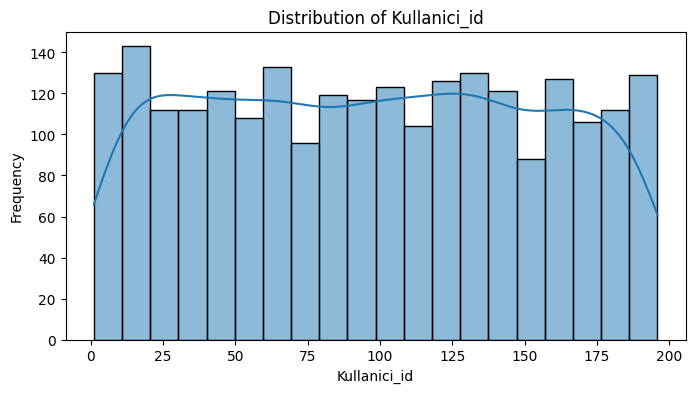

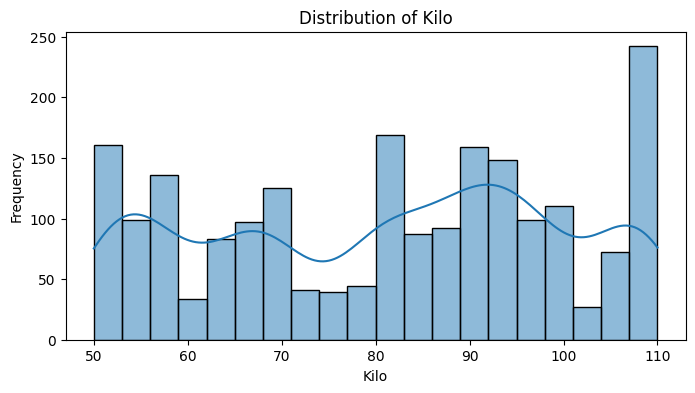

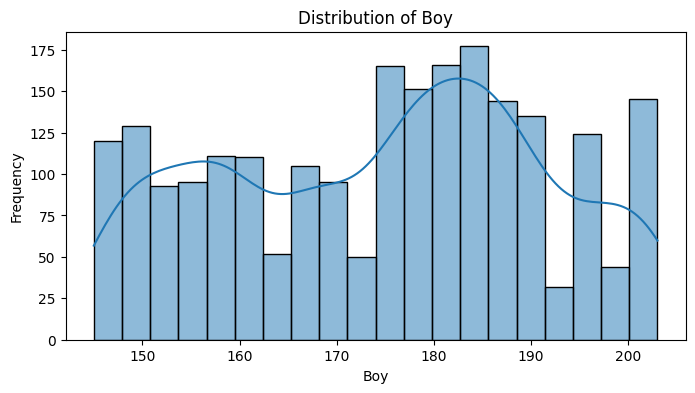

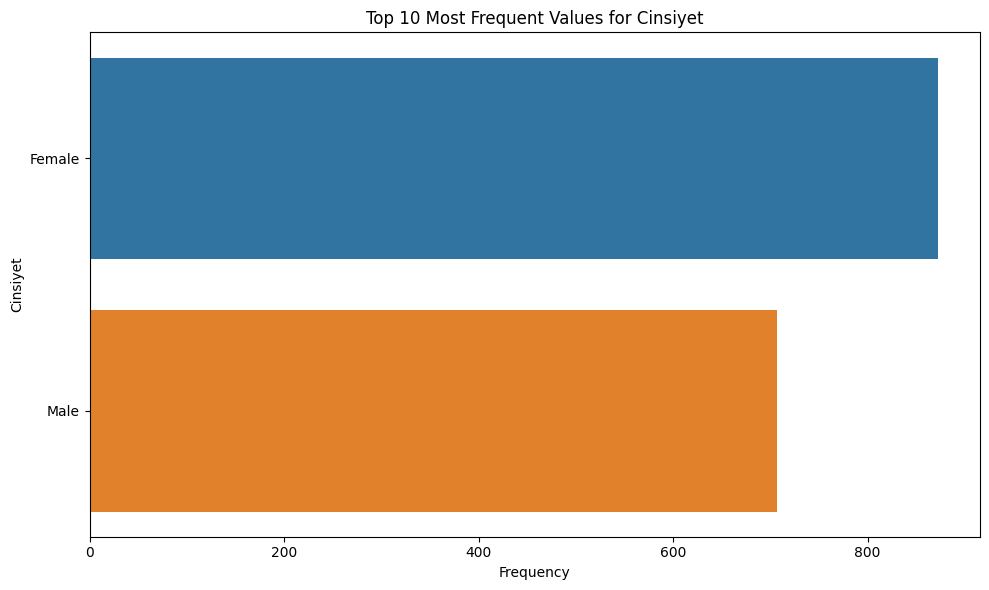

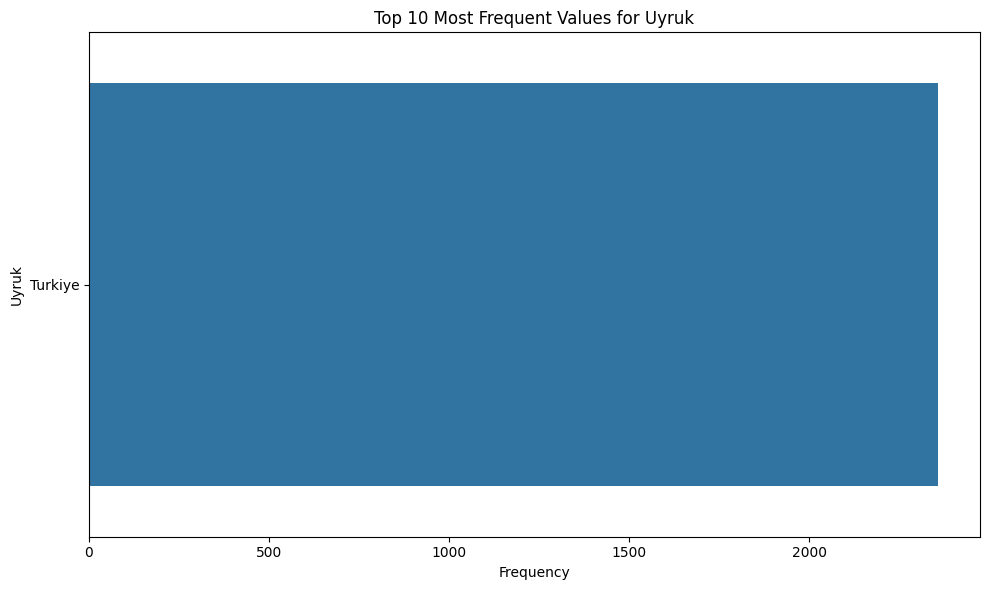

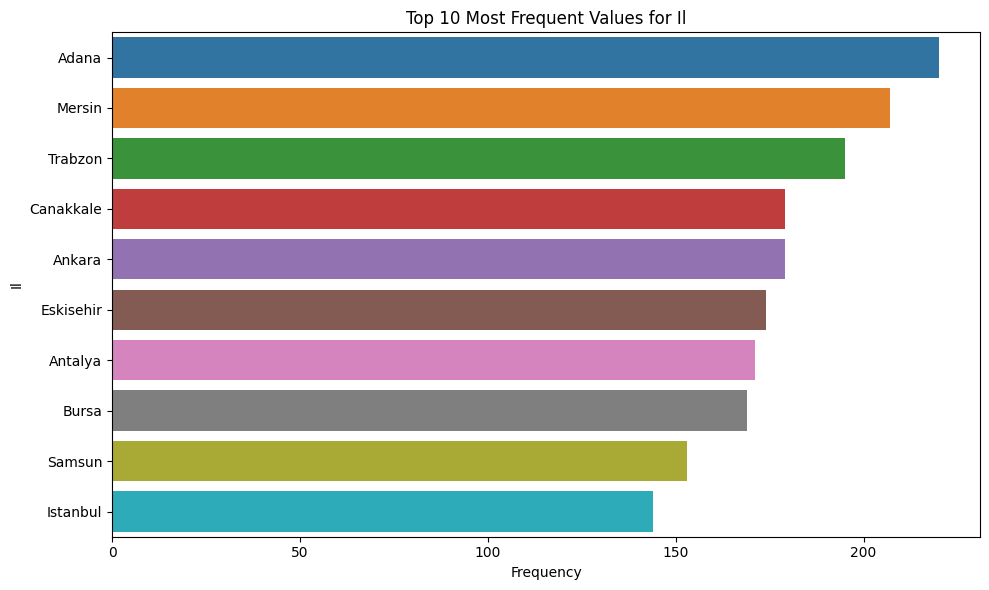

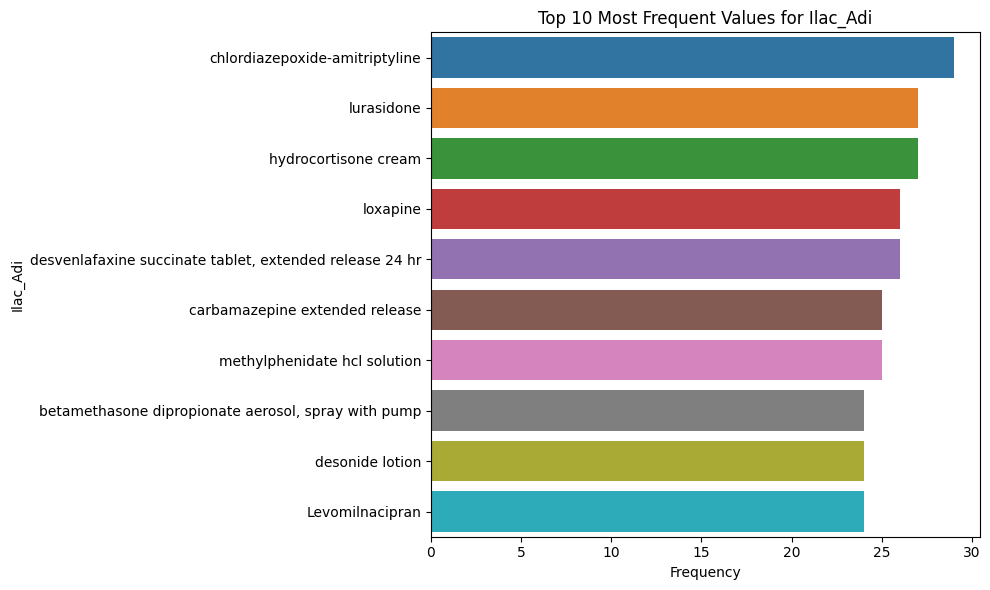

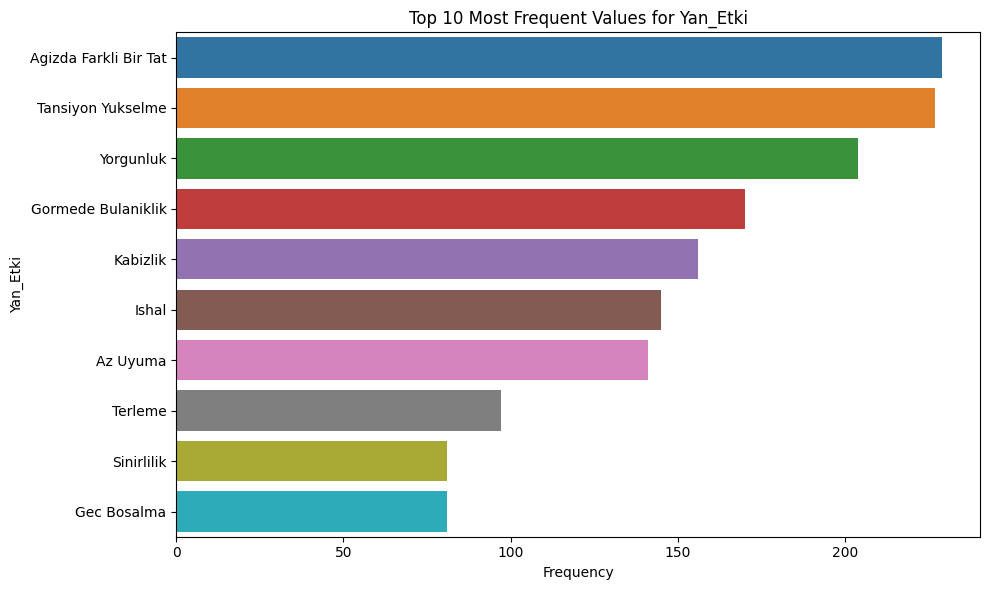

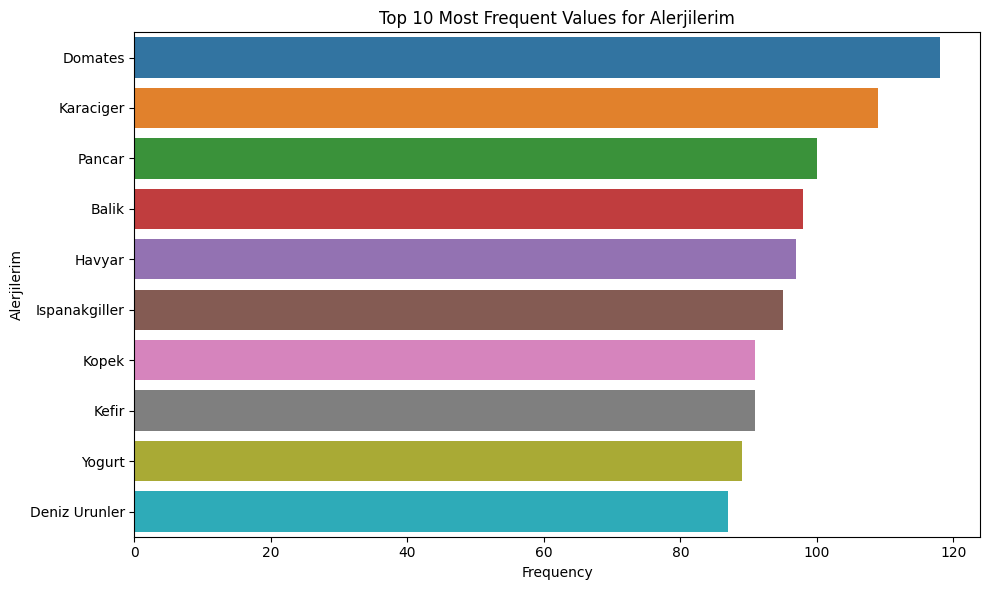

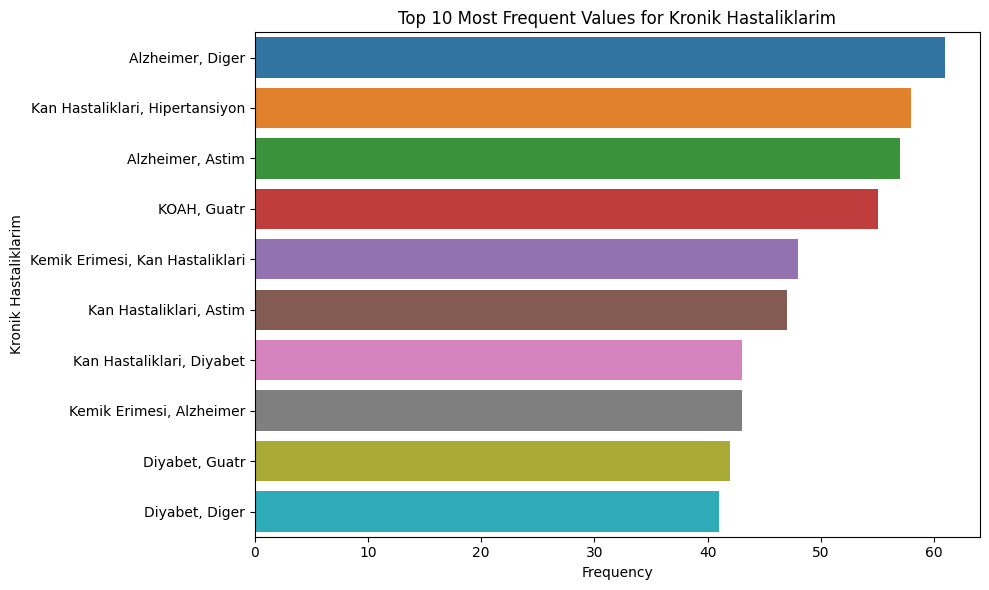

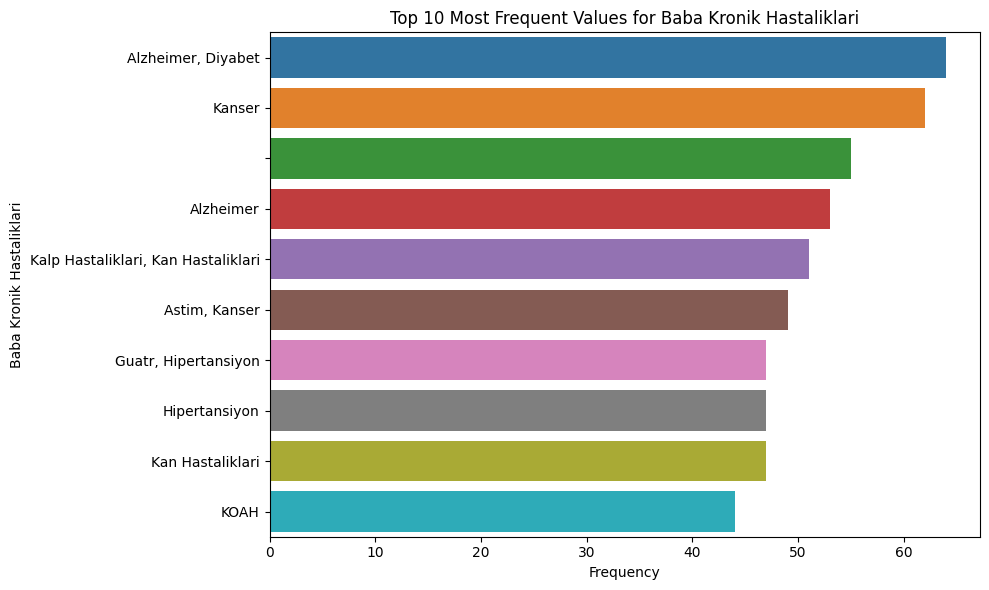

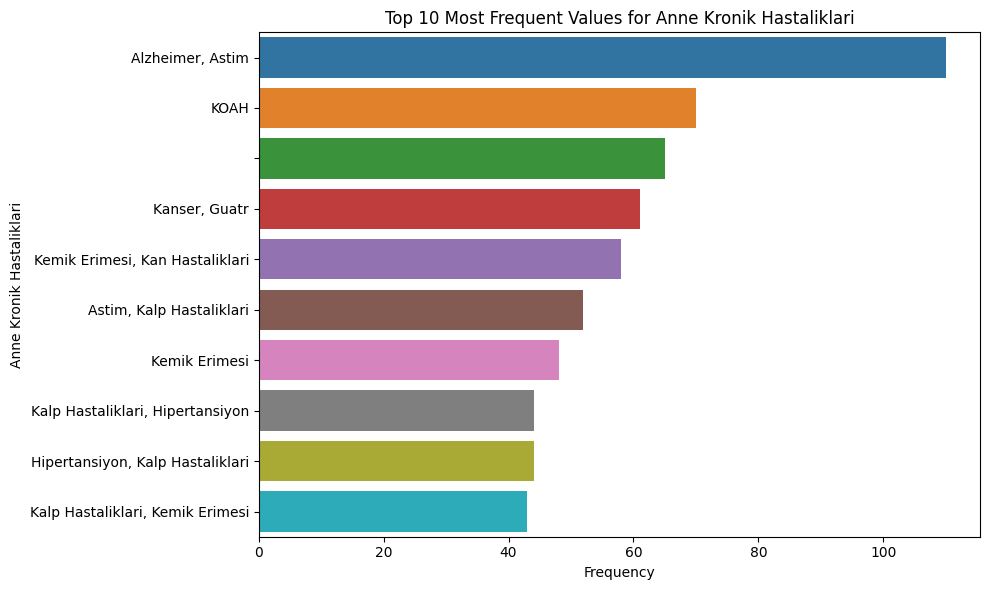

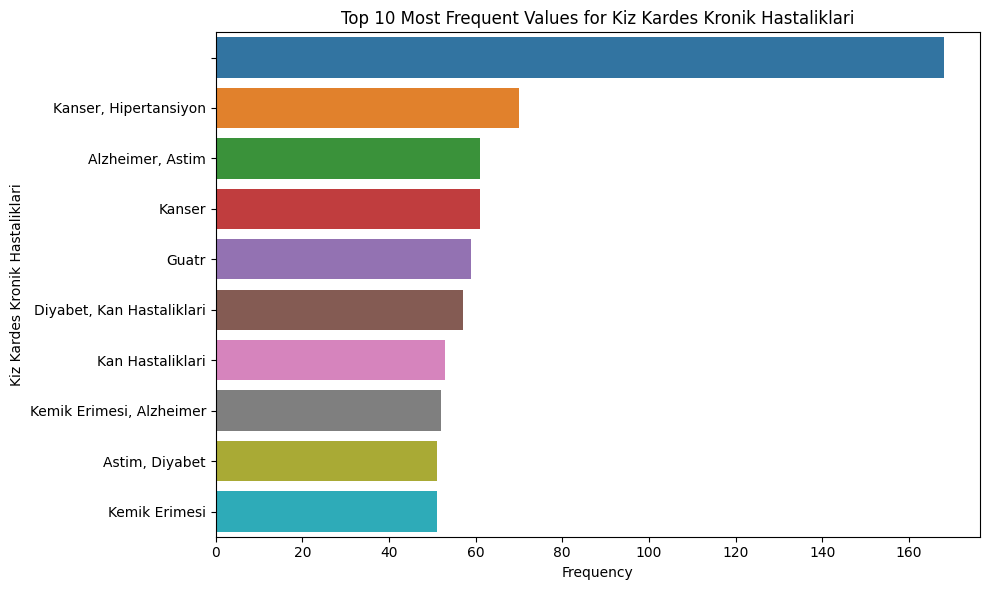

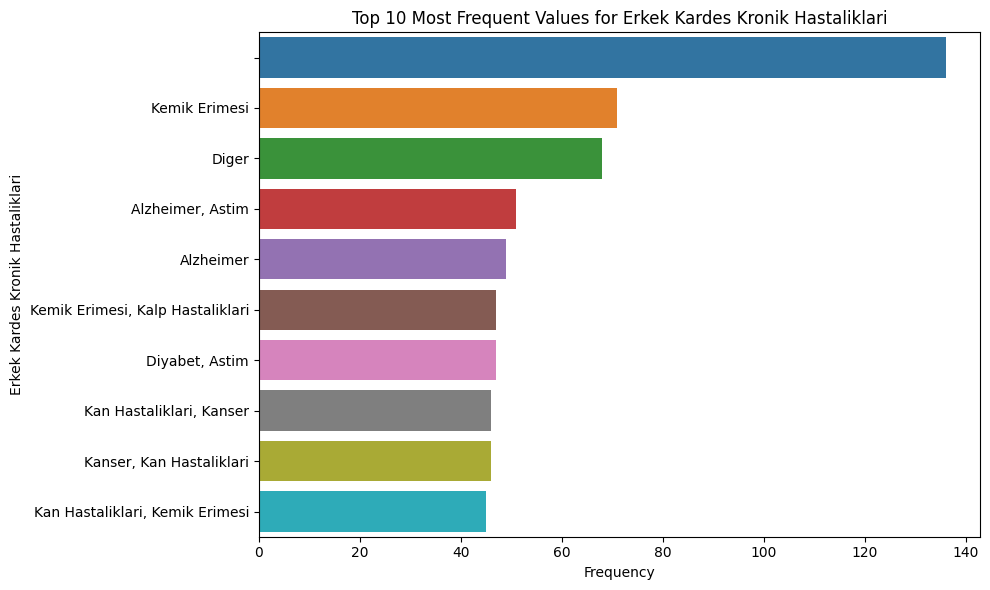

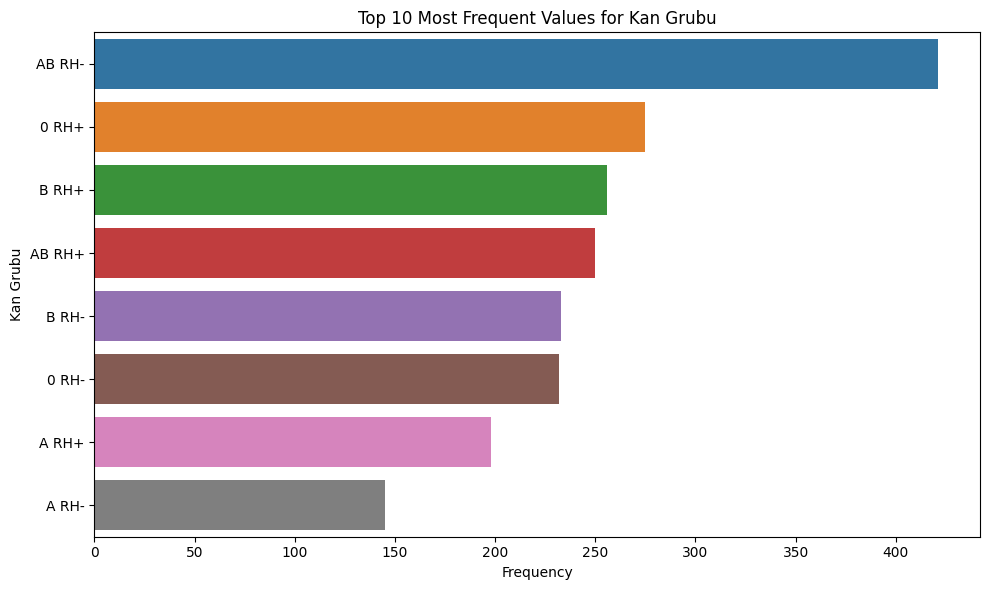

In [6]:
print("\nBasic statistics for numerical columns:")
print(data[numerical_columns].describe())

import matplotlib.pyplot as plt
import seaborn as sns

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

for column in categorical_columns:
    plt.figure(figsize=(10, 6))  
    sns.countplot(y=data[column], order=data[column].value_counts().index[:10])  
    plt.title(f'Top 10 Most Frequent Values for {column}')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.yticks(rotation=0, fontsize=10)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


## Step 5: Correlation Matrix and Distribution Analysis

In this step, we focus on analyzing relationships between numerical variables and visualizing their distributions. We will:
1. **Correlation Matrix**: Calculate and visualize the correlation between all numerical variables using a heatmap.
2. **Significant Correlations**: Highlight and display only the significant correlations (greater than 0.5 or less than -0.5).
3. **Distribution Analysis**: Create boxplots and histograms to visualize the distribution and detect potential outliers in numerical variables.

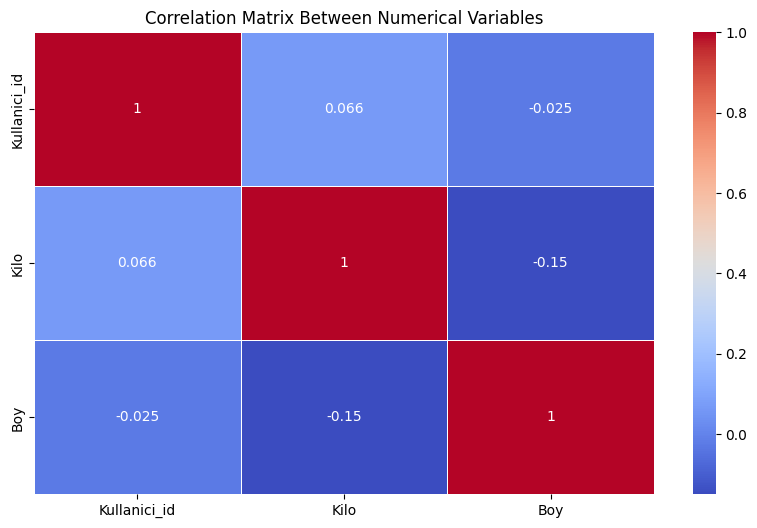

Significant Correlations (greater than 0.5 or less than -0.5):
              Kullanici_id  Kilo  Boy
Kullanici_id           1.0   NaN  NaN
Kilo                   NaN   1.0  NaN
Boy                    NaN   NaN  1.0
             Kullanici_id Kilo  Boy
Kullanici_id          1.0          
Kilo                       1.0     
Boy                             1.0


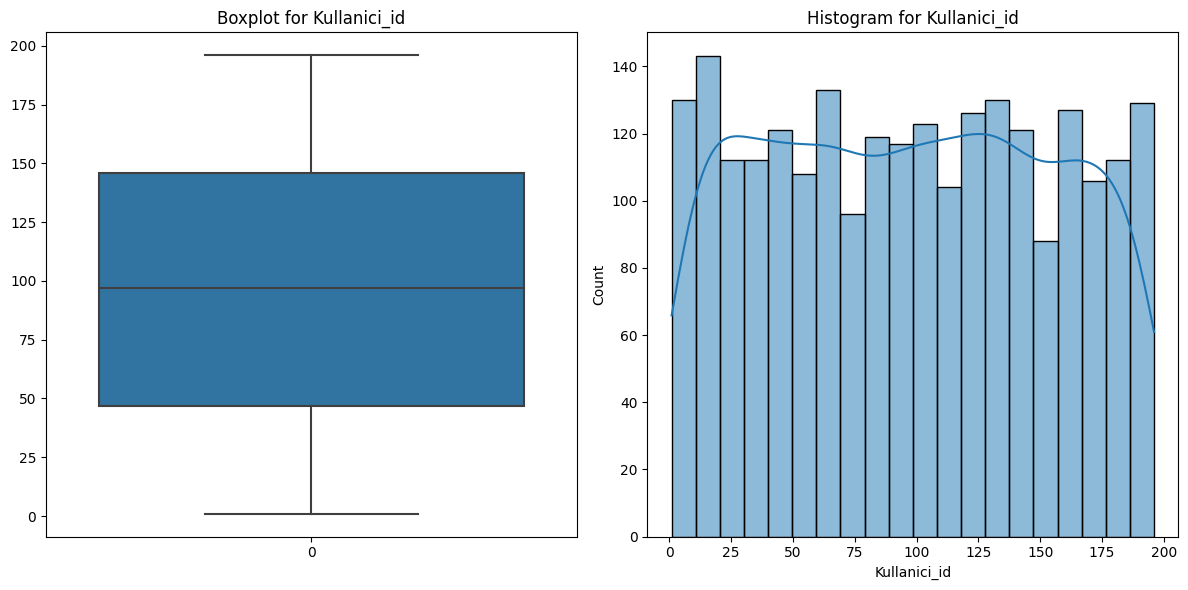

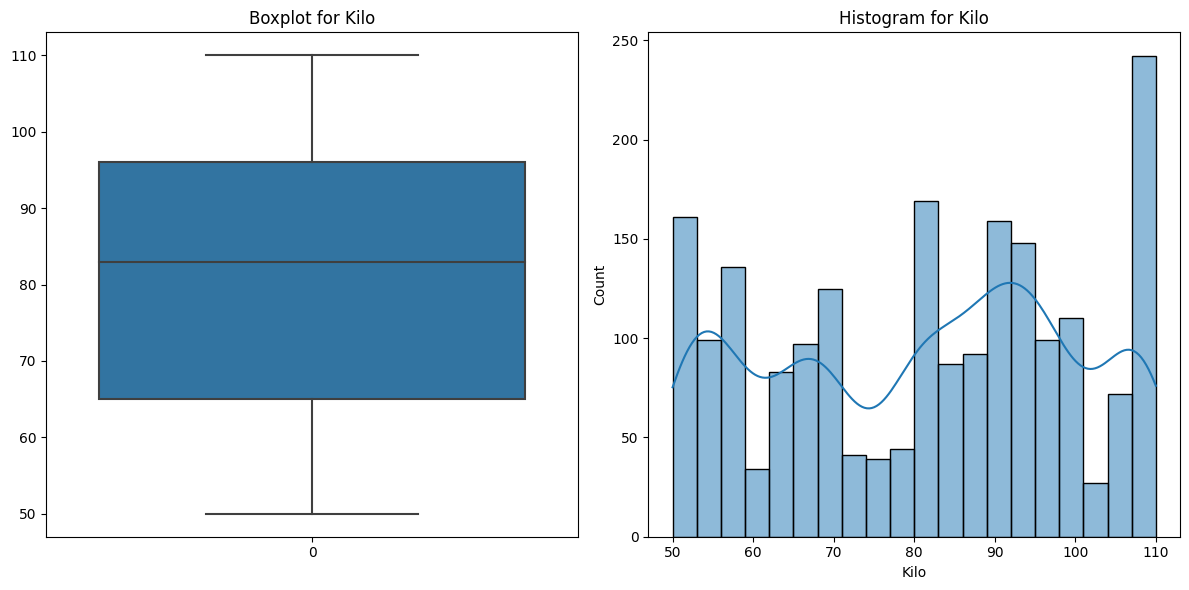

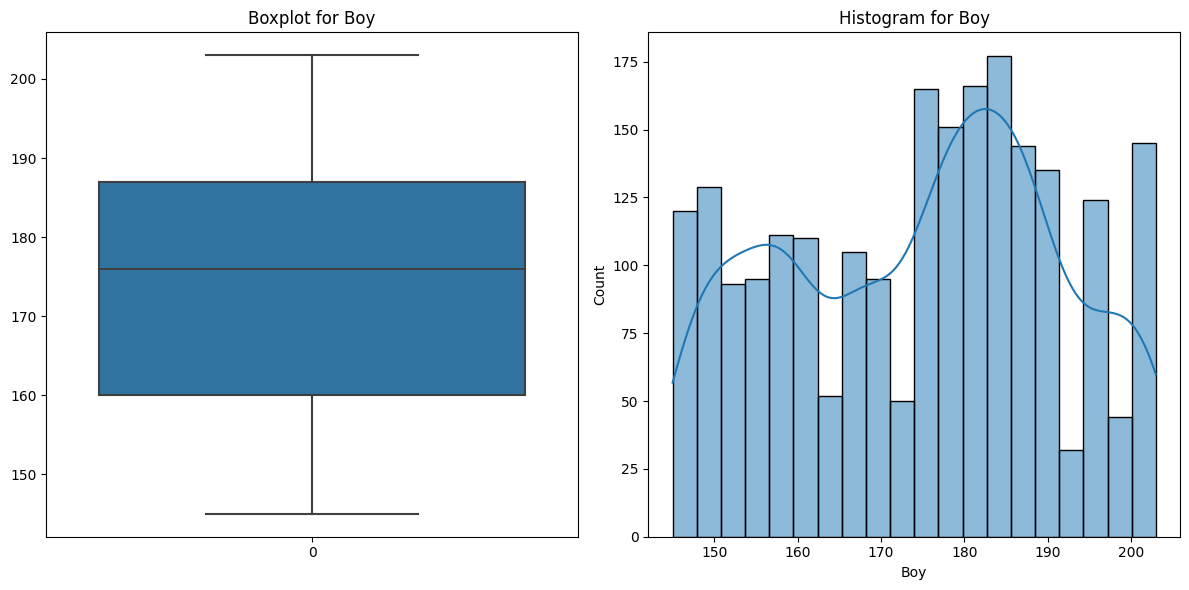

In [7]:
# Create and visualize the correlation matrix between numerical variables
plt.figure(figsize=(10, 6))
corr_matrix = data[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Between Numerical Variables')
plt.show()

# Display the correlation matrix in tabular format
corr_matrix = data[numerical_columns].corr()

# Highlight only significant correlations (greater than 0.5 or less than -0.5)
important_corrs = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

print("Significant Correlations (greater than 0.5 or less than -0.5):")
print(important_corrs)

# Fill missing values with empty strings for cleaner display
important_corrs.fillna('', inplace=True)

# Display the significant correlations in tabular format
print(important_corrs)

import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots and histograms for numerical variables
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    
    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data[column])
    plt.title(f'Boxplot for {column}')
    
    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Histogram for {column}')
    
    plt.tight_layout()
    plt.show()


## Step 6: Analysis of Chronic Diseases

In this step, I focus on analyzing the **Kronik Hastalıklarim**  column. Since this column can contain multiple diseases for each patient, we split the diseases into separate entries and analyze the distribution of all the listed diseases.


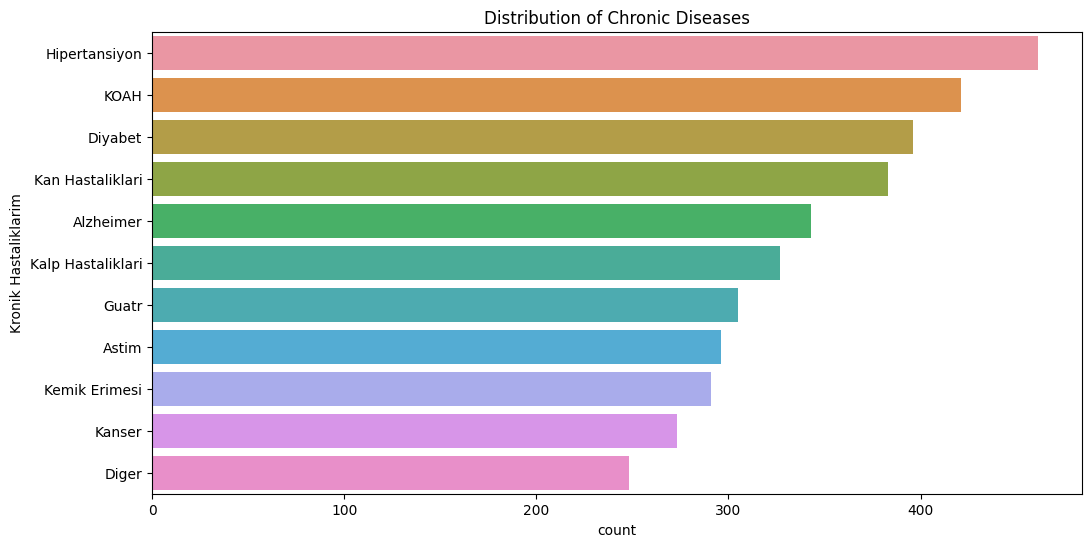

In [8]:
data['Kronik Hastaliklarim'] = data['Kronik Hastaliklarim'].str.split(', ')
kronik_hastaliklar = data.explode('Kronik Hastaliklarim')

plt.figure(figsize=(12, 6))
sns.countplot(y=kronik_hastaliklar['Kronik Hastaliklarim'], order=kronik_hastaliklar['Kronik Hastaliklarim'].value_counts().index)
plt.title('Distribution of Chronic Diseases')
plt.show()


## Step 7: Adding New Features - Age and Drug Usage Duration

In this step, I create two new features based on existing data:
1. **Age**: Calculated from the `Dogum_Tarihi` column.
2. **Drug Usage Duration**: Calculated as the difference between `Ilac_Baslangic_Tarihi`  and `Ilac_Bitis_Tarihi`, measured in days.

I then visualize the distributions of both the age and drug usage duration to better understand the spread and patterns in the data.





New features successfully added: Yas (Age) and Ilac_Kullanim_Suresi (Drug Usage Duration).


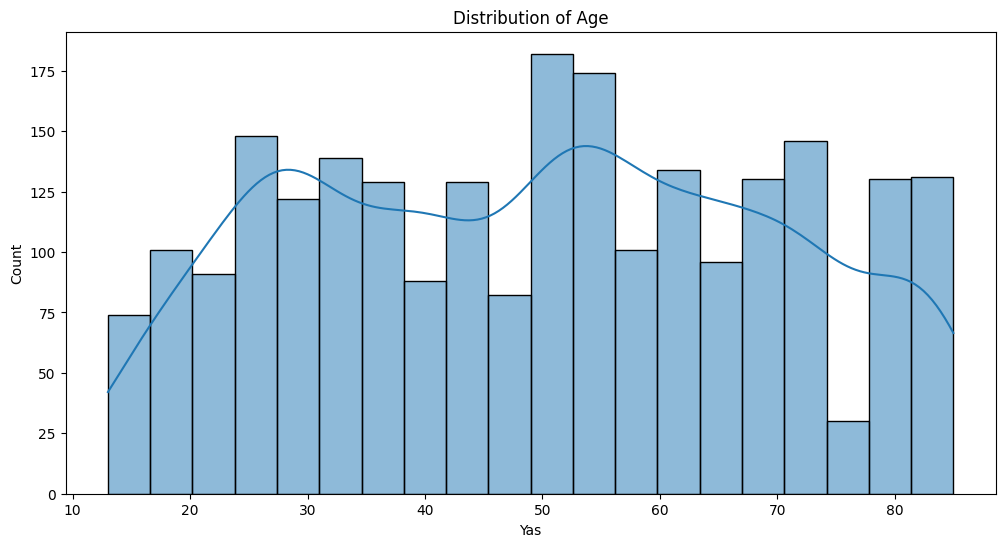

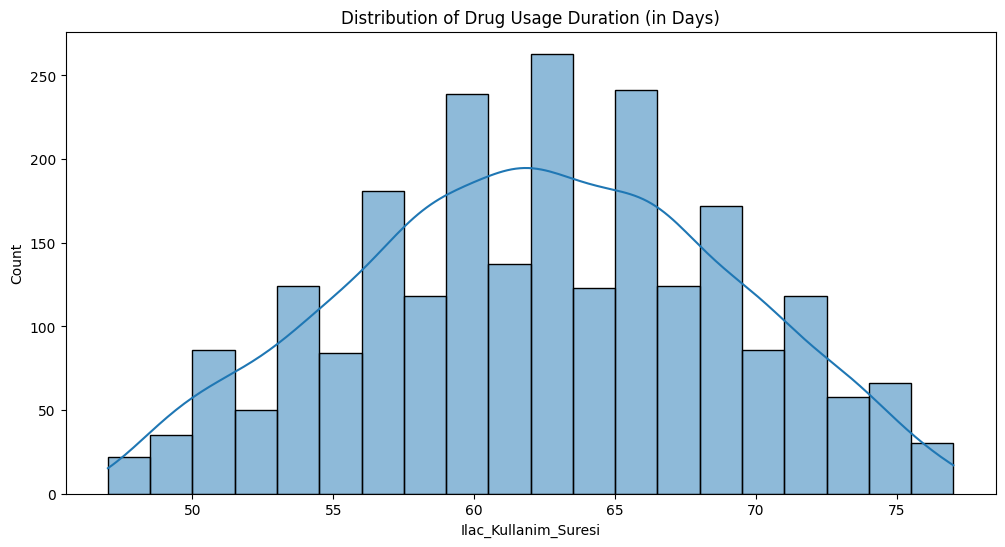

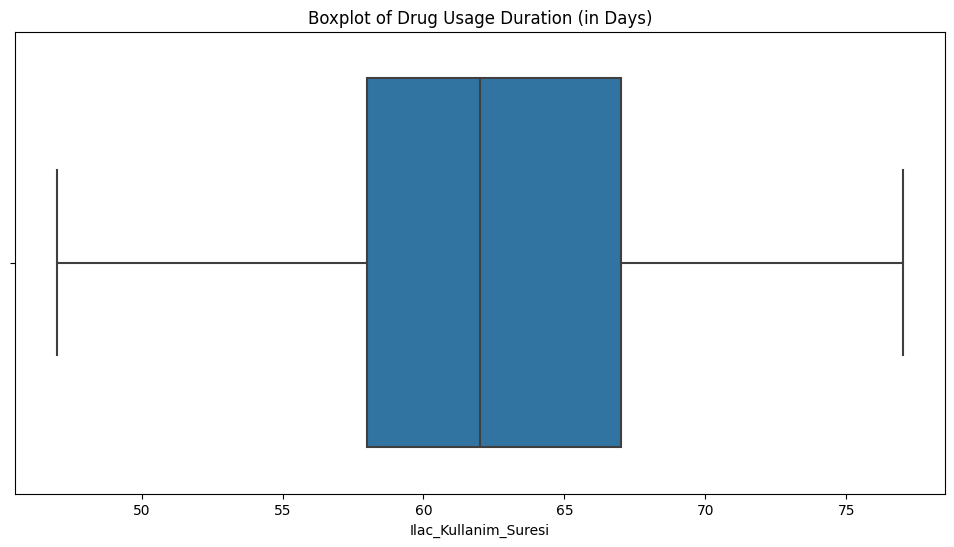

Average drug usage durations (in days):
Ilac_Adi
methylphenidate er tablet, extended release 24 hr    68.200000
mirtazapine                                          66.133333
betamethasone valerate ointment                      65.923077
fluoxetine dr                                        65.571429
valproic acid solution                               65.461538
                                                       ...    
Prednicarbate cream                                  58.933333
lithium carbonate                                    58.857143
divalproeks sodyum er                                58.285714
fluocinonide cream                                   58.272727
methylphenidate                                      56.666667
Name: Ilac_Kullanim_Suresi, Length: 151, dtype: float64


In [9]:
data['Yas'] = 2024 - data['Dogum_Tarihi'].dt.year 


data['Ilac_Kullanim_Suresi'] = (data['Ilac_Bitis_Tarihi'] - data['Ilac_Baslangic_Tarihi']).dt.days

print("\nNew features successfully added: Yas (Age) and Ilac_Kullanim_Suresi (Drug Usage Duration).")


plt.figure(figsize=(12, 6))
sns.histplot(data['Yas'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['Ilac_Kullanim_Suresi'], bins=20, kde=True)
plt.title('Distribution of Drug Usage Duration (in Days)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Ilac_Kullanim_Suresi', data=data)
plt.title('Boxplot of Drug Usage Duration (in Days)')
plt.show()

ilac_kullanim_suresi = data.groupby('Ilac_Adi')['Ilac_Kullanim_Suresi'].mean().sort_values(ascending=False)

print("Average drug usage durations (in days):")
print(ilac_kullanim_suresi)


## Step 8: Analyzing the Relationship Between Drugs and Side Effects

In this step, I explore the relationship between drugs and the side effects they cause, along with the duration of drug usage. This will help to understand which drugs are more frequently associated with certain side effects and how long they are typically used.

Usage counts for each drug and its side effects:
                         Ilac_Adi           Yan_Etki  Count
1006                   lurasidone  Tansiyon Yukselme      6
1369                  risperidone              Ishal      6
986                      loxapine           Kabizlik      5
160   asenapine sublingual tablet  Tansiyon Yukselme      5
1251                paroxetine er           Az Uyuma      5
...                           ...                ...    ...
851               hydroxyzine hcl     Uykululuk Hali      1
854                   iloperidone           Az Uyuma      1
855                   iloperidone     Deride Morarma      1
270              carbamazepine cr          Gucsuzluk      1
1606  zolpidem tablet, sublingual          Yorgunluk      1

[1607 rows x 3 columns]


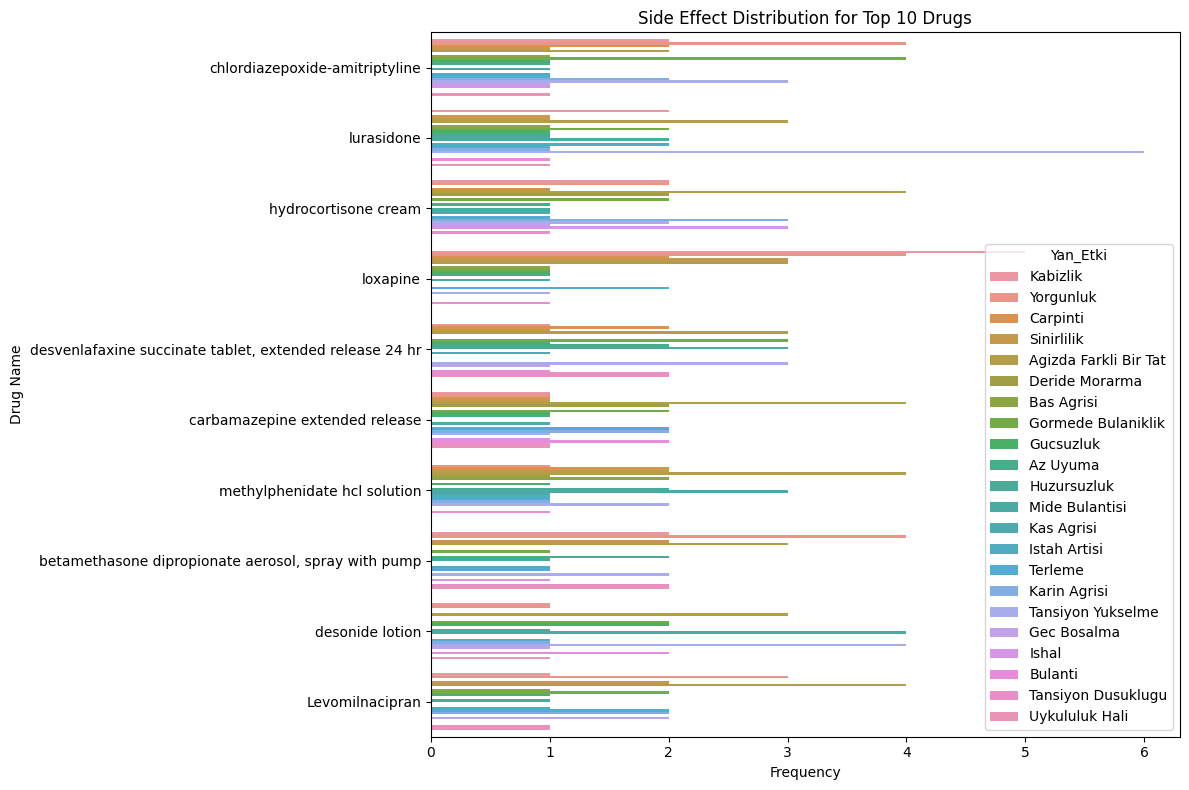

Relationship between drugs, side effects, and usage duration (average in days):
                         Ilac_Adi               Yan_Etki  Ilac_Kullanim_Suresi
0                 Levomilnacipran  Agizda Farkli Bir Tat             64.500000
1                 Levomilnacipran             Bas Agrisi             53.000000
2                 Levomilnacipran            Gec Bosalma             63.000000
3                 Levomilnacipran     Gormede Bulaniklik             64.000000
4                 Levomilnacipran              Gucsuzluk             63.000000
...                           ...                    ...                   ...
1602  zolpidem tablet, sublingual               Kabizlik             73.000000
1603  zolpidem tablet, sublingual     Tansiyon Dusuklugu             54.333333
1604  zolpidem tablet, sublingual      Tansiyon Yukselme             67.000000
1605  zolpidem tablet, sublingual                Terleme             57.500000
1606  zolpidem tablet, sublingual              Yorg

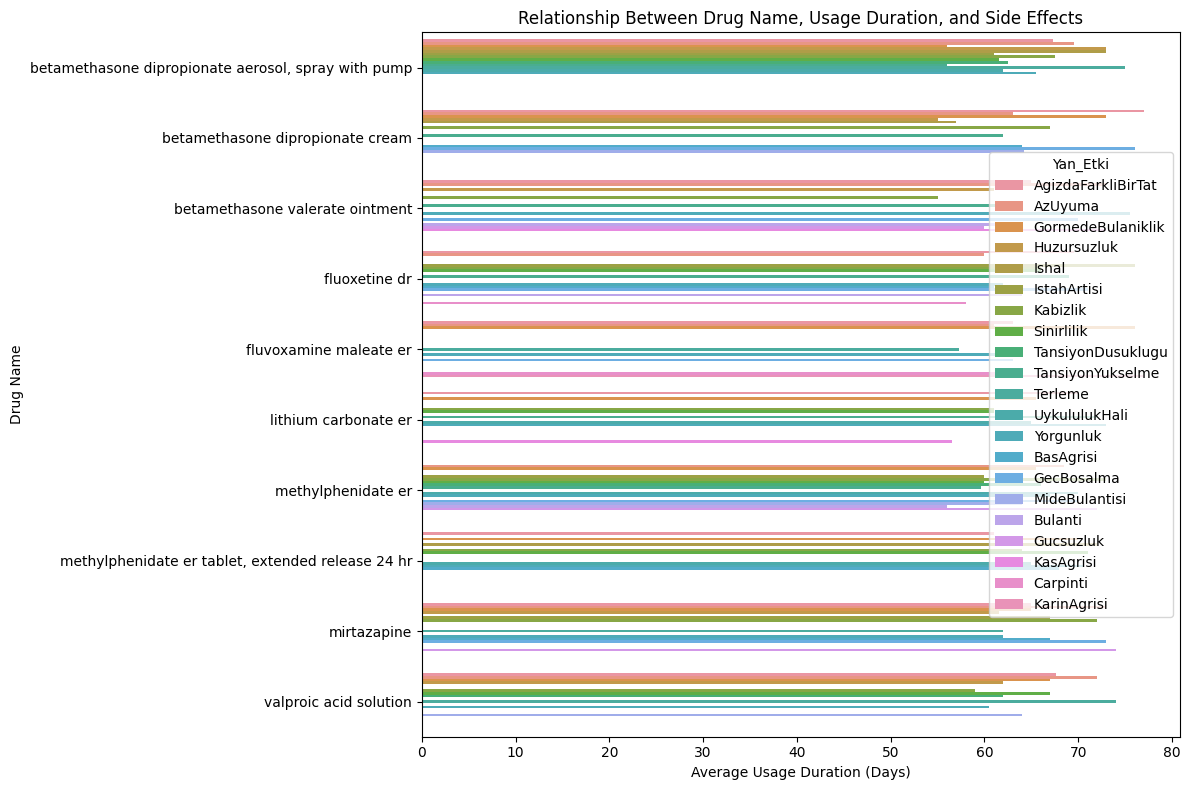

In [10]:
ilac_hastalik_analizi = data.groupby(['Ilac_Adi', 'Yan_Etki']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

print("Usage counts for each drug and its side effects:")
print(ilac_hastalik_analizi)

plt.figure(figsize=(12, 8))
sns.countplot(y='Ilac_Adi', hue='Yan_Etki', data=data, order=data['Ilac_Adi'].value_counts().index[:10])
plt.title('Side Effect Distribution for Top 10 Drugs')
plt.xlabel('Frequency')
plt.ylabel('Drug Name')
plt.tight_layout()
plt.show()

ilac_sure_yanetki = data.groupby(['Ilac_Adi', 'Yan_Etki'])['Ilac_Kullanim_Suresi'].mean().reset_index()

print("Relationship between drugs, side effects, and usage duration (average in days):")
print(ilac_sure_yanetki)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data['Yan_Etki'] = data['Yan_Etki'].astype(str).str.replace(' ', '').str.split(',')

data_exploded = data.explode('Yan_Etki')

data_exploded['Ilac_Kullanim_Suresi'] = (pd.to_datetime(data_exploded['Ilac_Bitis_Tarihi']) - pd.to_datetime(data_exploded['Ilac_Baslangic_Tarihi'])).dt.days

ilac_sure_yanetki = data_exploded.groupby(['Ilac_Adi', 'Yan_Etki'])['Ilac_Kullanim_Suresi'].mean().reset_index()

top_ilaclar = ilac_sure_yanetki.groupby('Ilac_Adi')['Ilac_Kullanim_Suresi'].mean().nlargest(10).index

plt.figure(figsize=(12, 8))
sns.barplot(x='Ilac_Kullanim_Suresi', y='Ilac_Adi', hue='Yan_Etki', data=ilac_sure_yanetki[ilac_sure_yanetki['Ilac_Adi'].isin(top_ilaclar)])
plt.title('Relationship Between Drug Name, Usage Duration, and Side Effects')
plt.xlabel('Average Usage Duration (Days)')
plt.ylabel('Drug Name')
plt.tight_layout()
plt.show()


## Part 2: Data Preprocessing


## Step 1: Handling Missing Values

In this step, I handle missing values found in the dataset based on the EDA analysis. I apply different strategies for numerical and categorical variables:
- **Numerical Variables**: I fill missing values using the mean of each column.
- **Categorical Variables**: I replace missing values with the constant value `"unknown"`.

In [11]:
from sklearn.impute import SimpleImputer

numerical_imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])

categorical_imputer = SimpleImputer(strategy='constant', fill_value='unknown')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

print("Missing data was successfully filled.")


Missing data was successfully filled.


In [12]:
missing_data_after = data.isnull().sum()

missing_data_after = missing_data_after[missing_data_after > 0]

if missing_data_after.empty:
    print("All missing data have been successfully filled. There are no missing values ​​left in the dataset.")
else:
    print("Some columns remain missing data:")
    print(missing_data_after)


All missing data have been successfully filled. There are no missing values ​​left in the dataset.


## Step 2: Encoding Categorical Variables


In this step, I encode categorical variables to prepare them for modeling. Since some variables (e.g., **Kronik Hastaliklarim**, **Yan_Etki**) contain multiple categories, I first split them correctly. Afterward, I use **OneHotEncoder** to convert the categorical variables into numerical ones.


In [13]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

print("Categorical columns before encoding:")
print(data[['Cinsiyet', 'Uyruk', 'Il', 'Ilac_Adi', 'Kan Grubu']].head())

one_hot_columns = ['Cinsiyet', 'Uyruk', 'Il', 'Ilac_Adi', 'Kan Grubu']  

encoder = OneHotEncoder(sparse=False, drop=None)  
encoded_columns = encoder.fit_transform(data[one_hot_columns])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(one_hot_columns))

print("\nNew encoded columns (in binary format):")
print(encoded_df.head())
print(f"Number of new columns: {encoded_df.shape[1]}")

data = pd.concat([data.drop(columns=one_hot_columns), encoded_df], axis=1)

print("Categorical variables were encoded successfully.")

print("\nFirst 5 rows of encoded dataset:")
print(data.head())

print("\nEncoded categories and column names:")
print(encoder.get_feature_names_out(one_hot_columns))


Categorical columns before encoding:
  Cinsiyet    Uyruk         Il                        Ilac_Adi Kan Grubu
0     Male  Turkiye  Canakkale                 trifluoperazine     B RH-
1     Male  Turkiye    Trabzon                fluphenazine hcl   unknown
2   Female  Turkiye  Canakkale                 warfarin sodium     B RH-
3     Male  Turkiye      Adana                   valproic acid    AB RH-
4   Female  Turkiye      Izmir  carbamazepine extended release    AB RH-

New encoded columns (in binary format):
   Cinsiyet_Female  Cinsiyet_Male  Cinsiyet_unknown  Uyruk_Turkiye  Il_Adana   
0              0.0            1.0               0.0            1.0       0.0  \
1              0.0            1.0               0.0            1.0       0.0   
2              1.0            0.0               0.0            1.0       0.0   
3              0.0            1.0               0.0            1.0       1.0   
4              1.0            0.0               0.0            1.0       0.0   

   

c:\Users\7981\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Step 4: Normalization or Standardization of Numerical Variables

In this step, I scale the numerical variables in the dataset to bring them to the same scale. I use **StandardScaler** to standardize the variables, transforming them so that they have a mean of 0 and a standard deviation of 1. 

In [14]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Kilo', 'Boy', 'Ilac_Kullanim_Suresi']  

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("Numerical variables have been successfully standardized.")

print("\nFirst 5 rows of the standardized dataset:")
print(data[numerical_columns].head())


Numerical variables have been successfully standardized.

First 5 rows of the standardized dataset:
       Kilo       Boy  Ilac_Kullanim_Suresi
0  1.269686  1.015705             -1.252373
1  0.007809  0.394918             -0.644028
2  0.696106 -1.032892             -0.339855
3  0.000000 -0.598341              0.724749
4  1.040254 -0.163790             -1.556545


## Step 5: Final Check of the Processed Data

Before moving on to modeling, I will perform a final check to ensure that:
1. There are no missing values left in the dataset.
2. The data types are correct for all columns (numerical and categorical).
3. We view the first few rows of the final dataset to confirm that all preprocessing steps have been correctly applied.

In [15]:
missing_data_final_check = data.isnull().sum()

if missing_data_final_check.sum() == 0:
    print("There is no missing data in the data set.")
else:
    print("There is missing data:")
    print(missing_data_final_check[missing_data_final_check > 0])

print("\nChecking data types:")
print(data.dtypes)

print("\nFirst 5 rows of the final dataset:")
print(data.head())


There is no missing data in the data set.

Checking data types:
Kullanici_id                    float64
Dogum_Tarihi             datetime64[ns]
Ilac_Baslangic_Tarihi    datetime64[ns]
Ilac_Bitis_Tarihi        datetime64[ns]
Yan_Etki                         object
                              ...      
Kan Grubu_AB RH+                float64
Kan Grubu_AB RH-                float64
Kan Grubu_B RH+                 float64
Kan Grubu_B RH-                 float64
Kan Grubu_unknown               float64
Length: 194, dtype: object

First 5 rows of the final dataset:
   Kullanici_id Dogum_Tarihi Ilac_Baslangic_Tarihi Ilac_Bitis_Tarihi   
0         107.0   1960-03-01            2022-01-09        2022-03-04  \
1         140.0   1939-10-12            2022-01-09        2022-03-08   
2           2.0   1976-12-17            2022-01-11        2022-03-12   
3          83.0   1977-06-17            2022-01-04        2022-03-12   
4           7.0   1976-09-03            2022-01-13        2022-03-06   



**Last Step: Saving the processed dataset as a CSV file**

In [16]:
processed_file_path_csv = r'C:\Users\7981\Downloads\processed_side_effect_data.csv'
data.to_csv(processed_file_path_csv, index=False)

print(f"Dataset saved successfully: {processed_file_path_csv}")



Dataset saved successfully: C:\Users\7981\Downloads\processed_side_effect_data.csv
